# 1. KNN Implementation in Python (using Scikit-learn)


## Step 1. Importing Libraries

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


## Step 2. Loading the Dataset

In [60]:
# Load the dataset
df = pd.read_csv("./apartments_for_rent_classified_10K.csv", sep=";", encoding='cp1252')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


## Step 3. Data Preprocessing

In [61]:
# Drop rows with missing values in key numerical columns
numerical_cols = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']
df_cleaned = df.dropna(subset=numerical_cols)

# Display the cleaned dataset to ensure the cleaning worked
print(df_cleaned.head())

            id                category  \
2   5668626833  housing/rent/apartment   
3   5659918074  housing/rent/apartment   
5   5667891676  housing/rent/apartment   
8   5668610290  housing/rent/apartment   
14  5664571820  housing/rent/apartment   

                                                title  \
2   Studio apartment N Scott St, 14th St N, Arling...   
3                      Studio apartment 1717 12th Ave   
5                           0 BR in New York NY 10019   
8                        Studio apartment 333 Hyde St   
14                  Studio apartment 57 Taylor Street   

                                                 body  \
2   This unit is located at N Scott St, 14th St N,...   
3   This unit is located at 1717 12th Ave, Seattle...   
5   **RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...   
8   This unit is located at 333 Hyde St, San Franc...   
14  This unit is located at 57 Taylor Street, San ...   

                                      amenities  bathrooms  b

In [76]:
# Create price segments
df_cleaned['price_segment'] = pd.qcut(df['price'], q=3, labels=['low', 'medium', 'high'])

/var/folders/9b/m40fbxm571v1n3jg1ts0_lyh0000gn/T/ipykernel_68260/2531837683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_segment'] = pd.qcut(df['price'], q=3, labels=['low', 'medium', 'high'])


In [77]:
# Select features and target variable
X = df_cleaned[['square_feet', 'bathrooms', 'bedrooms']]
y = df_cleaned['price_segment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4. Implementing the KNN Model

In [78]:
# Initialize KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict price segments for the test set
y_pred = knn.predict(X_test_scaled)


In [79]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN in Python: {accuracy:.2f}')


Accuracy of KNN in Python: 0.45


## Step 5. Visualizing Results 

### 1. Confusion Matrix

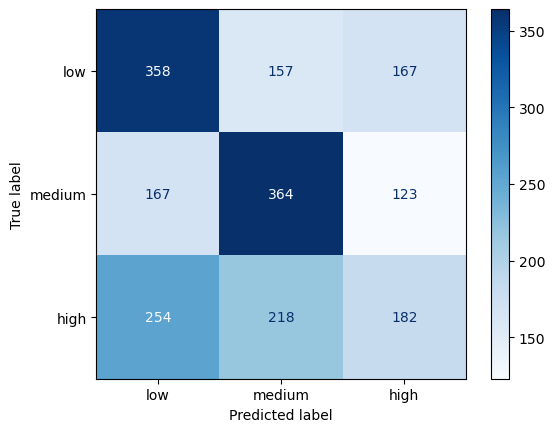

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')


### 2. Bar Chart: Segment Distribution

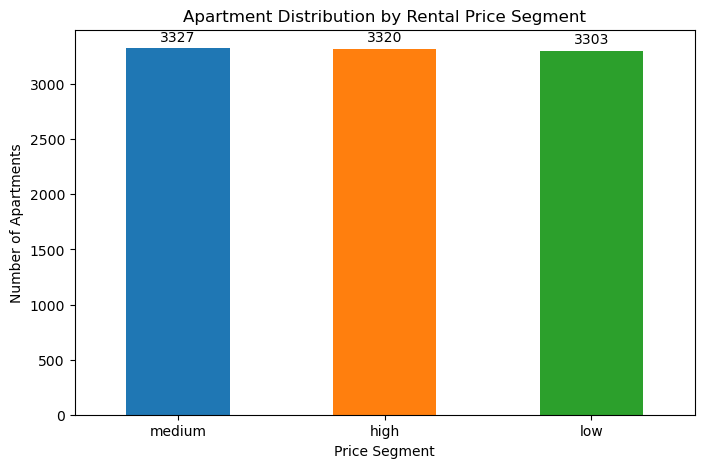

In [81]:
import matplotlib.pyplot as plt

# Count the number of apartments in each price segment
segment_counts = df_cleaned['price_segment'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = segment_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Apartment Distribution by Rental Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Number of Apartments')
plt.xticks(rotation=0)

# Annotate bars with counts
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 size=10, xytext=(0, 8), 
                 textcoords='offset points')

plt.show()

### 3. Evaluation Metrics (Precision, Recall, F1-Score)

In [82]:
# Import classification_report for precision, recall, and F1-score
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['low', 'medium', 'high']))


              precision    recall  f1-score   support

         low       0.46      0.52      0.49       682
      medium       0.49      0.56      0.52       654
        high       0.39      0.28      0.32       654

    accuracy                           0.45      1990
   macro avg       0.45      0.45      0.45      1990
weighted avg       0.45      0.45      0.45      1990

